In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv("clean_data.csv", low_memory = False, index_col = "Unnamed: 0")

In [3]:
# isolate the covid vaccine data
covid_df = data_df.loc[data_df["VAX_TYPE"] == "COVID19"]
covid_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,RECOVD,NUMDAYS,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES
211596,896636,11/14/2020,SC,47,F,NaN,NaN,NaN,NaN,NaN,...,N,4.0,2,Y,Y,tetracycline,11/14/2020,COVID19,MODERNA,UNK
214170,902418,12/15/2020,NJ,56,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,none,12/15/2020,COVID19,PFIZER\BIONTECH,1
214172,902440,12/15/2020,AZ,35,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,NaN,12/15/2020,COVID19,PFIZER\BIONTECH,1
214175,902446,12/15/2020,WV,55,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,"Contrast Dye IV contrast, shellfish, strawberry",12/15/2020,COVID19,PFIZER\BIONTECH,1
214183,902464,12/15/2020,LA,42,M,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,Y,none,12/15/2020,COVID19,PFIZER\BIONTECH,UNK


In [4]:
# age distribution
covid_df["AGE_YRS"].describe()

count    385931.000000
mean         48.835699
std          18.137543
min          12.000000
25%          35.000000
50%          49.000000
75%          63.000000
max         119.000000
Name: AGE_YRS, dtype: float64

In [5]:
# group into 9 year bins
bins = list([np.arange(12, 128, 9)])[0]
group_names = []

for age in bins[0: -1]:
    group_names.append(str(f"{age} to {age + 8}"))

group_names

['12 to 20',
 '21 to 29',
 '30 to 38',
 '39 to 47',
 '48 to 56',
 '57 to 65',
 '66 to 74',
 '75 to 83',
 '84 to 92',
 '93 to 101',
 '102 to 110',
 '111 to 119']

In [6]:
# assign bins based on age
covid_df["Bins"] = pd.cut(covid_df["AGE_YRS"], bins, labels = group_names, include_lowest = True)

# grab the categories of effect severity
cols = ["Bins", "OFC_VISIT", "ER_VISIT", "HOSPITAL", "DIED"]
agebins_df = covid_df[cols]
agebins_df.head()

<ipython-input-6-c492337f5d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["Bins"] = pd.cut(covid_df["AGE_YRS"], bins, labels = group_names, include_lowest = True)


,Bins,OFC_VISIT,ER_VISIT,HOSPITAL,DIED
211596,39 to 47,Y,NaN,NaN,NaN
214170,48 to 56,NaN,NaN,NaN,NaN
214172,30 to 38,NaN,NaN,NaN,NaN
214175,48 to 56,NaN,NaN,NaN,NaN
214183,39 to 47,NaN,NaN,NaN,NaN


In [7]:
# groupby bin and count each type of outcome
age_data = pd.DataFrame(agebins_df.groupby("Bins").count())
age_data

,OFC_VISIT,ER_VISIT,HOSPITAL,DIED
Bins,,,,
12 to 20,3458,5,1279,34
21 to 29,8030,5,1177,52
30 to 38,13468,11,1762,108
39 to 47,13807,9,2043,171
48 to 56,13304,9,2625,295
57 to 65,12033,9,3753,714
66 to 74,9025,2,4094,1047
75 to 83,4013,2,3277,1136
84 to 92,1299,2,1605,987


<AxesSubplot:title={'center':'Covid Office Visits'}, xlabel='Ages'>

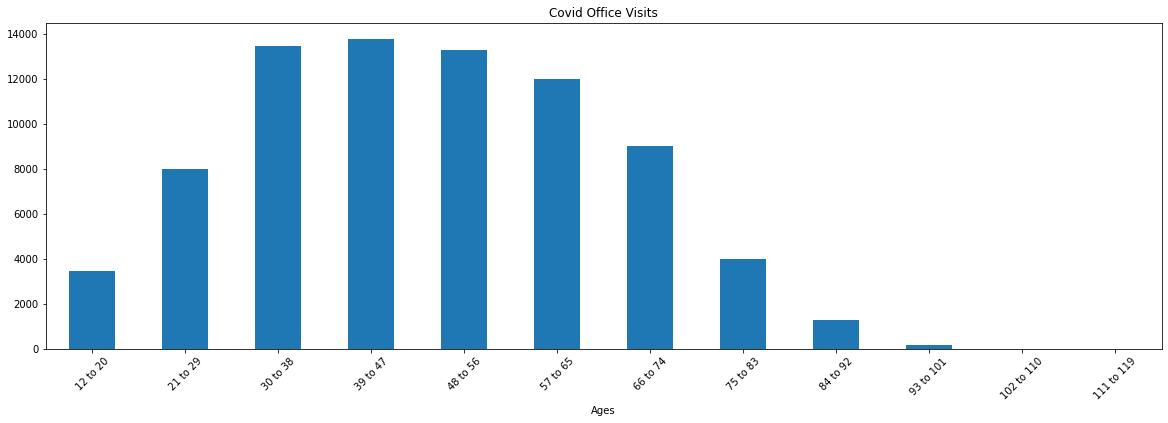

In [8]:
age_data["OFC_VISIT"].plot(kind = "bar", figsize = (20,6), title = "Covid Office Visits", xlabel = "Ages", rot = 45)

<AxesSubplot:title={'center':'Covid ER Visits'}, xlabel='Ages'>

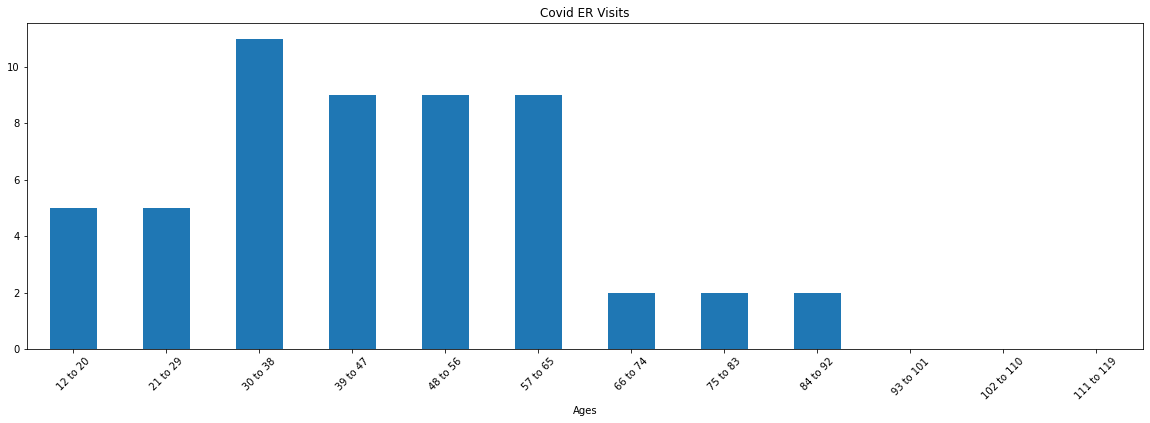

In [9]:
age_data["ER_VISIT"].plot(kind = "bar", figsize = (20,6), title = "Covid ER Visits", xlabel = "Ages", rot = 45)

<AxesSubplot:title={'center':'Covid Hospitalizations'}, xlabel='Ages'>

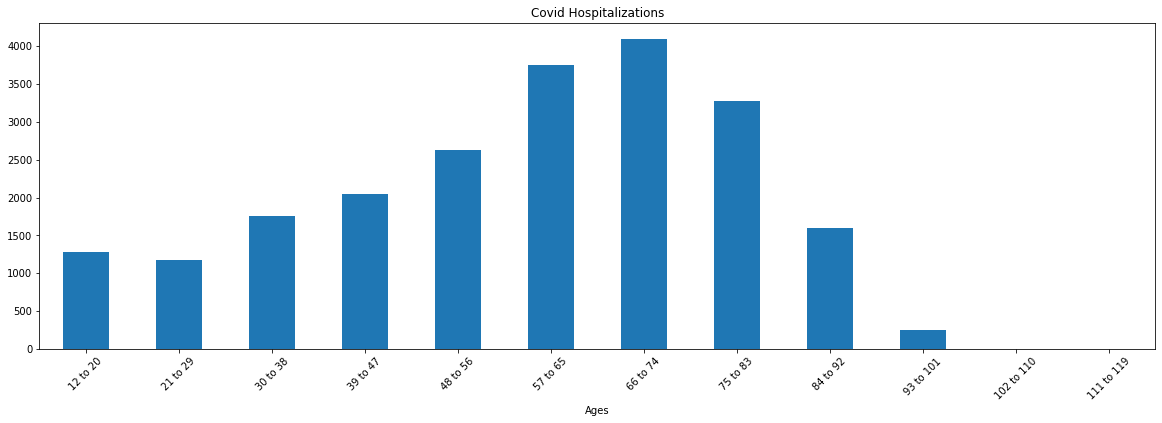

In [10]:
age_data["HOSPITAL"].plot(kind = "bar", figsize = (20,6), title = "Covid Hospitalizations", xlabel = "Ages", rot = 45)

<AxesSubplot:title={'center':'Covid Deaths'}, xlabel='Ages'>

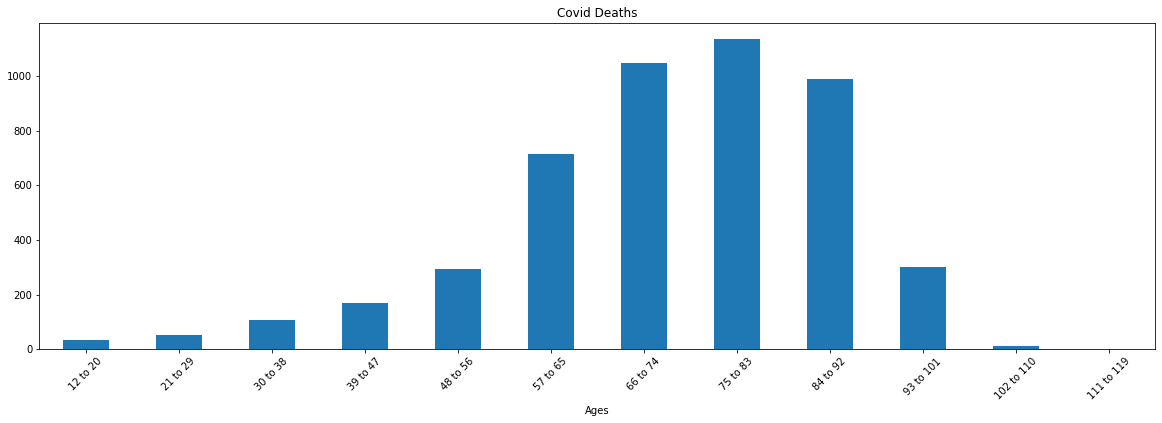

In [11]:
age_data["DIED"].plot(kind = "bar", figsize = (20,6), title = "Covid Deaths", xlabel = "Ages", rot = 45)